## Observations and Insights

## Dependencies and starter code

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mouse_study_df.head()
mouse_study_df = mouse_metadata.set_index('Mouse ID').join(study_results.set_index('Mouse ID'))
mouse_study_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary statistics

In [103]:
# Rename Volume column
mouse_study_df = mouse_study_df.rename(columns={'Tumor Volume (mm3)': 'Volume'})  
mouse_study_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Volume,Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1


In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = mouse_study_df.groupby('Drug Regimen').agg(volume_mean = ('Volume', np.mean), volume_median = ('Volume', np.median), volume_variance = ('Volume', np.var), volume_std = ('Volume', np.std), volume_sem = ('Volume', st.sem)).round(2)
summary_table

,volume_mean,volume_median,volume_variance,volume_std,volume_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [109]:
mouse_study_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Volume,Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Bar plots

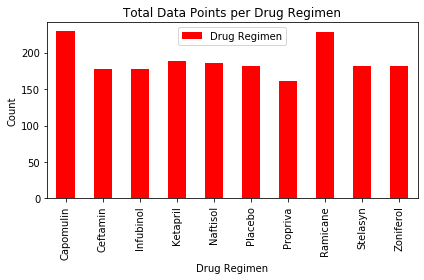

In [110]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen = mouse_study_df.groupby('Drug Regimen')
regimen_count = pd.DataFrame(regimen['Drug Regimen'].count())
regimen_chart = regimen_count.plot(kind='bar', title="Total Data Points per Drug Regimen", color="red")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Count")
plt.tight_layout()

plt.show()

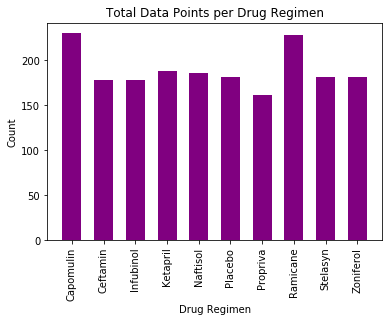

In [111]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = np.arange(len(regimen))
tick_locations = [value for value in x]
plt.bar(x, regimen_count["Drug Regimen"], color='purple', align="center", width = 0.60)
plt.xticks(tick_locations, list(regimen_count.index), rotation="vertical")

plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Total Data Points per Drug Regimen')
plt.show()

## Pie plots

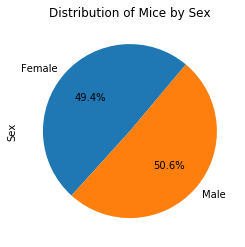

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_study_df.groupby(['Sex'])
gender2 = pd.DataFrame(gender['Sex'].count())
gender2.plot(kind='pie', y='Sex',title = 'Distribution of Mice by Sex', startangle = 50, legend = False, autopct = "%1.1f%%")
gender2.plot

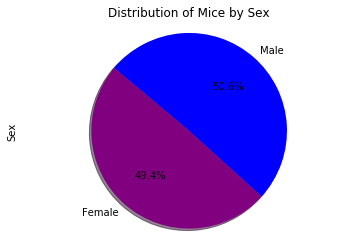

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
finalNumbers = list(gender2.index.values)
gender_counts = mouse_study_df.groupby(['Sex']).count()['Volume']
colors = ["Purple", "Blue"]


plt.pie(gender_counts, labels= finalNumbers, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Mice by Sex")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
promising_regimen = mouse_study_df[mouse_study_df['Drug Regimen'].isin(regimen_list)]
final_tumor = promising_regimen.groupby(['Drug Regimen','Mouse ID']).agg(Last_tumor_size=('Volume',lambda x: x.iloc[-1])).round(2)
unstack_final = final_tumor.stack(level=0).unstack(level=0)


for regimen in regimen_list:
    quartiles = unstack_final[regimen].quantile([.25,.5,.75]).round(2)
    up = quartiles[0.75].round(2)
    low = quartiles[0.25].round(2)
    iqr = round(up-low,2)
    lower_group = round(low - (1.5*iqr),2)
    upper_group = round(up + (1.5*iqr),2)
    
    counter = 0
        
    if counter == 0:
        print(f"---------------------------------")
    print(f"{regimen}:")
    print(f"Lower quartile of {regimen} is: {low}")
    print(f"Upper quartile of {regimen} is: {up}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"If {regimen} value is lower than {lower_group} it is a potential outlier.")
    print(f"If {regimen} value is higher than {upper_group} it is a potential outlier.")
   
    counter += 1

---------------------------------
Capomulin:
Lower quartile of Capomulin is: 32.38
Upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
If Capomulin value is lower than 20.71 it is a potential outlier.
If Capomulin value is higher than 51.83 it is a potential outlier.
---------------------------------
Ramicane:
Lower quartile of Ramicane is: 31.56
Upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
If Ramicane value is lower than 17.91 it is a potential outlier.
If Ramicane value is higher than 54.31 it is a potential outlier.
---------------------------------
Infubinol:
Lower quartile of Infubinol is: 54.05
Upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
If Infubinol value is lower than 36.83 it is a potential outlier.
If Infubinol value is higher than 82.75 it is a potential outlier.
---------------------------------
Ceftamin:
Lower quartile of Ceftamin is: 48.72
Upper quartile of Ceftami

([<matplotlib.axis.XTick at 0x1c4408680c8>,
 <a list of 4 Text xticklabel objects>)

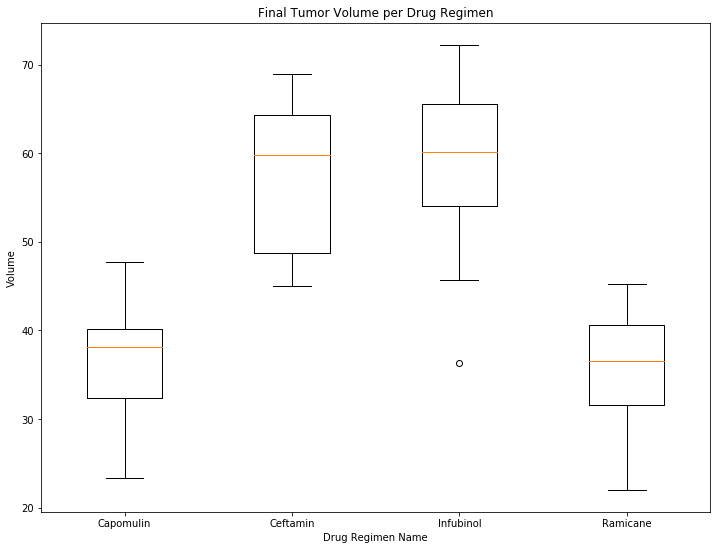

In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_TVol = []

for regimen in unstack_final:
    box_plot_TVol.append(list(unstack_final[regimen].dropna()))


fig1, ax = plt.subplots(figsize=(12,9))
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_xlabel('Drug Regimen Name')
ax.set_ylabel('Volume')
ax.boxplot(box_plot_TVol)
plt.xticks([1,2,3,4],unstack_final)

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume')

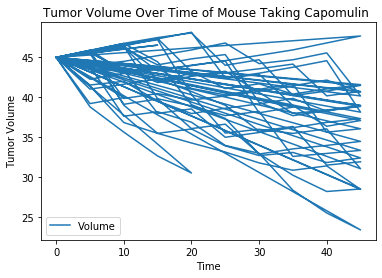

In [118]:
# Create a dataframe for only the Capomulin data
capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
capomulin.plot.line(x='Timepoint', y='Volume')
plt.title("Tumor Volume Over Time of Mouse Taking Capomulin ")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

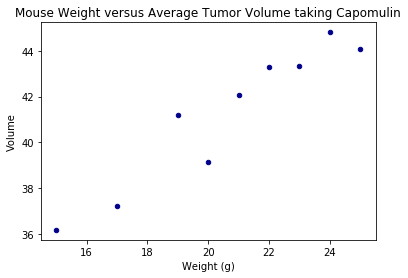

In [119]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
promising_regimens = ['Capomulin']
tmpDf = mouse_study_df[mouse_study_df['Drug Regimen'].isin(promising_regimens)]
tmpDf = tmpDf.groupby(['Weight (g)'], as_index=False).mean()
tmpDf.plot.scatter(x='Weight (g)', y='Volume', c='DarkBlue', title = "Mouse Weight versus Average Tumor Volume taking Capomulin")

In [122]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen

# Drug Regimen equals Capomulin
capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and get average of weight and volume 
cap = capomulin.groupby(['Mouse ID']).agg(cap_mouse_weight=('Weight (g)', np.mean),cap_vol_mean=('Volume', np.mean)).round(3)

# Peason's co-efficient 
pearson = st.pearsonr(cap['cap_mouse_weight'],cap['cap_vol_mean'])
print(f"The correlation is {round(pearson[0],3)}")

The correlation is 0.842


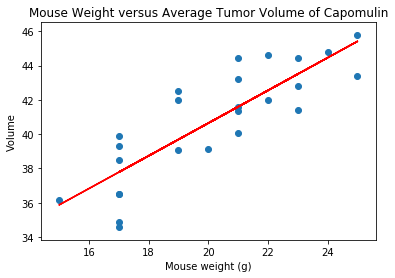

In [124]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

x = cap['cap_mouse_weight']
y = cap['cap_vol_mean']

linregress(x, y)
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")
plt.scatter(x, y)
plt.title("Mouse Weight versus Average Tumor Volume of Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Volume")

plt.show()